In [1]:
# I import the libraries I'm going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This is the data I am given
p1 = 99
p2 = 77
c1 = 51
c2 = 29

# Now I am goin to find how many coins does the Captain really have.

## I'm making a list of all the possible number of coins that the captain could have.

The total number of coins is given by this equation:<br>
i(Coins_Per_Pirate) * pN(Number_of_Pirates) + cN(Coins_for_Captain)

1. For the first set of data I know that the total number of coins is given by this equation:
    - i * 99 + 55
2. For the second set of data I know that the total number of coins is given by this equation:
    - i * 77 + 29    
    
I know for sure that the Captain has less than 1000 coins, so I can stop my list when I get to that number.

In [3]:
# Equation 1 
l1 = []
for i in range(1,100):
    if i*p1+c1 < 1000:
        l1.append(i*p1+c1)
    else:
        break

In [4]:
print(l1)

[150, 249, 348, 447, 546, 645, 744, 843, 942]


In [5]:
# Equation 2
l2 = []
for i in range(1,100):
    if i*p2+c2 < 1000:
        l2.append(i*p2+c2)
    else:
        break

In [6]:
print(l2)

[106, 183, 260, 337, 414, 491, 568, 645, 722, 799, 876, 953]


## In order to make my job easier, now I am making two Pandas DataFrames (one with every list)

In [7]:
# DF 1
d1 = {'Coins Per Pirate':[],
      'Total Coins':[]}
number = 1
for i in l1:
    d1['Coins Per Pirate'].append(number)
    d1['Total Coins'].append(i)
    number += 1
pirates1 = pd.DataFrame(d1)
pirates1

,Coins Per Pirate,Total Coins
0,1,150
1,2,249
2,3,348
3,4,447
4,5,546
5,6,645
6,7,744
7,8,843
8,9,942


In [8]:
# DF 2
d2 = {'Coins Per Pirate':[],
      'Total Coins':[]}
number = 1
for i in l2:
    d2['Coins Per Pirate'].append(number)
    d2['Total Coins'].append(i)
    number += 1
pirates2 = pd.DataFrame(d2)
pirates2

,Coins Per Pirate,Total Coins
0,1,106
1,2,183
2,3,260
3,4,337
4,5,414
5,6,491
6,7,568
7,8,645
8,9,722
9,10,799


## Now I am making a graph with both DataFrames

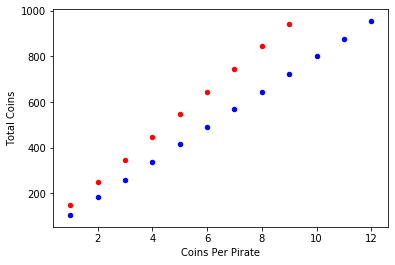

In [9]:
# Graph
ax = pirates1.plot(color='red', kind='scatter', x='Coins Per Pirate', y='Total Coins')
pirates2.plot(ax=ax, color='blue', kind='scatter', x='Coins Per Pirate', y='Total Coins')

We can see that both DataFrames have around 650 coins in one point. The red one (pirates1) when every pirates gets 6 coins, and the blue one (pirates2) when every one gets 8 coins.

In [10]:
# I match the two lists in order to find the total number of coins that the Captain has
for i in l1:
    if i in l2:
        print(i)
        coins = i

645


### Now we can say for certain that the Captain has 645 coins

In [11]:
coins

645

# Now I have to find the maximum number of coins given to the Captain

I know that the number of coins that he gets is given by the following equation:<br>
captain(Captain_Coins) = coins(Total_Numer_of_Coins) - i(Number_of_Pirates) * int(coins/i)(Coins_Per_Pirate)

I know that I cant have more than 645 Pirates, because every Pirate has to get at leat 1 Coin, and that I least there has to be 1 Pirate.

In [12]:
# DF with all the possibilities I have for the number of Pirates and the Coins that the Captains gets with each of them
options = {'Pirates':[],
            'Coins for the Captain':[]}
for i in range(1,coins+1):
    captain = coins - i * int(coins/i)
    options['Pirates'].append(i)
    options['Coins for the Captain'].append(captain)
captain = pd.DataFrame(options)
captain = captain.set_index('Pirates')
captain

,Coins for the Captain
Pirates,
1,0
2,1
3,0
4,1
5,0
...,...
641,4
642,3
643,2


## Now I'm making a Graph with the DataFrame

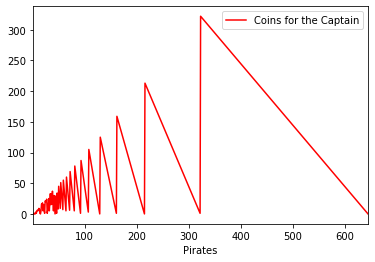

In [13]:
# Graphic Solution
ax = captain.plot(color='red')

We can easily see that around 325 pirates the Captain gets the maximum number of coins

In [14]:
# Now I find the Maximum Number of Coins for the Captain in the DF
captain[captain['Coins for the Captain'] == captain['Coins for the Captain'].max()]

,Coins for the Captain
Pirates,
323,322


# CONCLUSION

## The Maximum Number of Coins that the Captain can get given the "Pirate Law" is 322, and in order to get them, he has to chose a group of 323 pirate.